# รู้จักกับ pandas
read data CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
#from io import StringIO
#from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
st1 = pd.read_csv('data/sample.csv')
st1

,sample#,time(ms),Value
0,0,0,80.9908
1,1,2,71.4717
2,2,4,53.9869
3,3,6,35.0285
4,4,8,14.3773
...,...,...,...
595,595,1190,-447.7370
596,596,1192,1685.5200
597,597,1194,1942.0200
598,598,1196,1703.8800


In [6]:
st = pd.read_csv('data/sample.csv',index_col='sample#')
st
#st.info()

,time(ms),Value
sample#,,
0,0,80.9908
1,2,71.4717
2,4,53.9869
3,6,35.0285
4,8,14.3773
...,...,...
595,1190,-447.7370
596,1192,1685.5200
597,1194,1942.0200


In [ ]:
#st.plot('time(ms)','Value',kind='line');

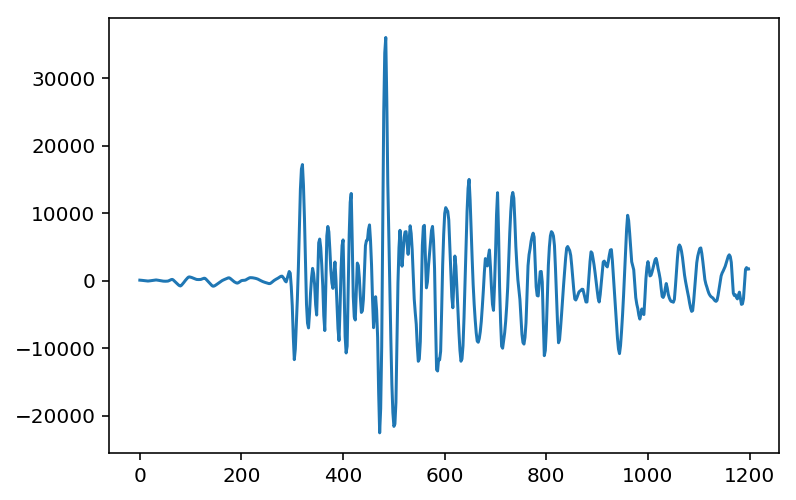

In [9]:
plt.plot(st['time(ms)'],st['Value'])

In [ ]:
#ax = st.plot.scatter(x='time(ms)',y='Value',grid=True);
#ax.set_ylabel('Amplitude');

In [10]:
# anather way to import data 
import csv
with open('data/sample.csv', 'r') as f:
    wines = list(csv.reader(f, delimiter=','))

wines=np.array(wines[1:],dtype=np.float)
#print(wines[:3])
t=wines[:,1]
amp=wines[:,2]
#st2=wines[:,1:3]

In [11]:
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 13;fig_size[1] = 3;
#plt.rcParams["figure.figsize"] = fig_size;

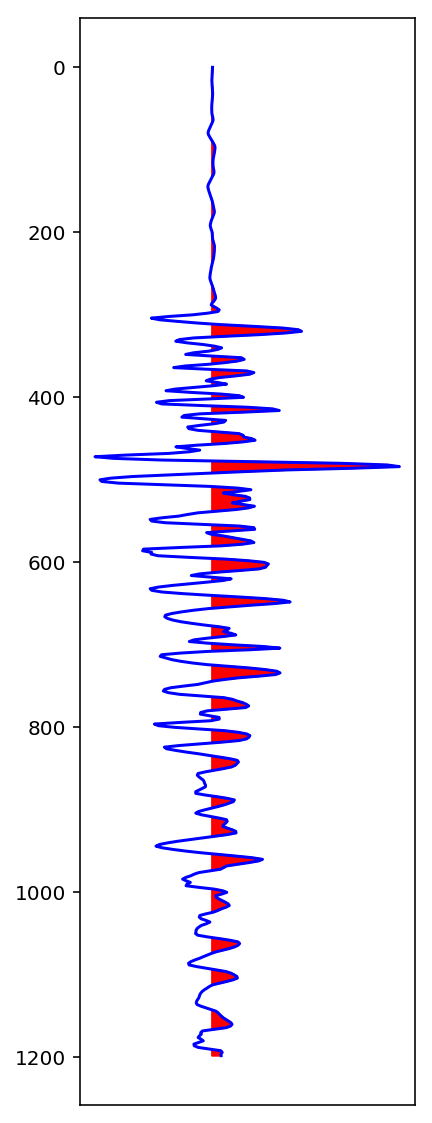

In [13]:
fig = plt.figure(figsize=(3, 10))
ax = fig.add_subplot(111)
ax.plot(amp,t, 'b')
ax.fill_betweenx(t, amp, 0, amp>0, color='r')
ax.invert_yaxis()
ax.set_xticks([])

plt.show()


In [14]:
with open('data/shottest.csv', 'r') as f:
    datain = list(csv.reader(f, delimiter=','))

shot1=np.array(datain[1:],dtype=np.float)
shot1.shape

(16384, 4)

In [15]:
dfshot= pd.read_csv('data/shottest.csv')
dfshot

,trace,Time,Sample,Amplitude
0,30,0,1,0.114354
1,30,2,2,0.284259
2,30,4,3,0.232822
3,30,6,4,0.195225
4,30,8,5,0.171219
...,...,...,...,...
16379,0,1014,508,-0.105547
16380,0,1016,509,0.001589
16381,0,1018,510,0.069688
16382,0,1020,511,0.044585


In [17]:
shot2 = np.genfromtxt("data/shottest.csv", delimiter=",", skip_header=1)
#shot2.shape
shot2

array([[ 3.00000000e+01,  0.00000000e+00,  1.00000000e+00,
         1.14354193e-01],
       [ 3.00000000e+01,  2.00000000e+00,  2.00000000e+00,
         2.84259260e-01],
       [ 3.00000000e+01,  4.00000000e+00,  3.00000000e+00,
         2.32821822e-01],
       ...,
       [ 0.00000000e+00,  1.01800000e+03,  5.10000000e+02,
         6.96875450e-02],
       [ 0.00000000e+00,  1.02000000e+03,  5.11000000e+02,
         4.45849750e-02],
       [ 0.00000000e+00,  1.02200000e+03,  5.12000000e+02,
        -7.13009800e-03]])

In [18]:
mat=np.transpose(shot2[:,3].reshape((32,512)))
time= shot2[0:512,1]
t0=shot2[0,1]
tmax=shot2[511,1]

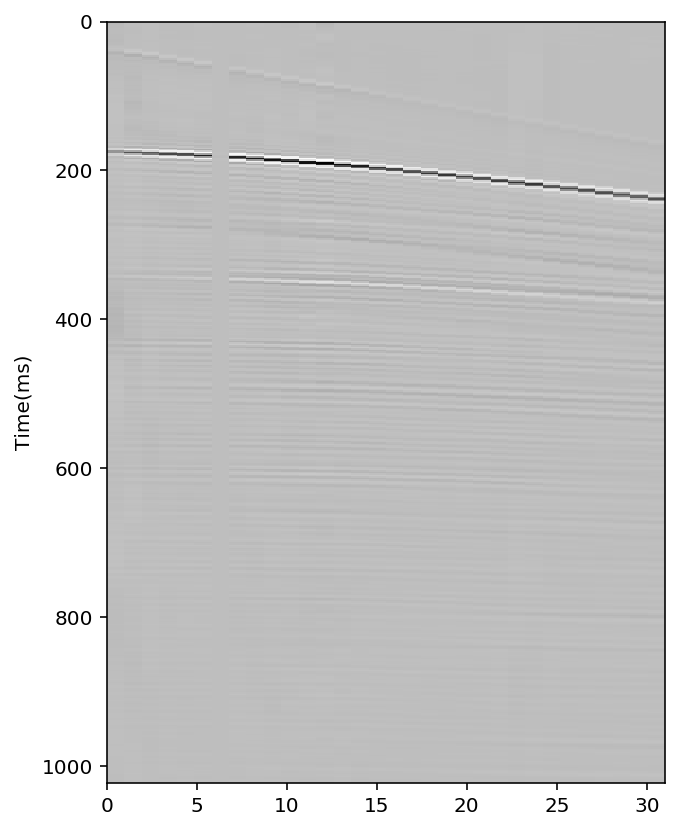

In [19]:
#plt.plot(mat)
plt.figure(figsize=(5, 7))
plt.imshow(mat, cmap="Greys", aspect="auto",origin='upper',extent=[0,31,tmax,t0])
plt.ylabel('Time(ms)')
plt.show()

In [20]:
!pip install fatiando

You should consider upgrading via the 'pip install --upgrade pip' command.


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


Text(0.5,0,'trace')

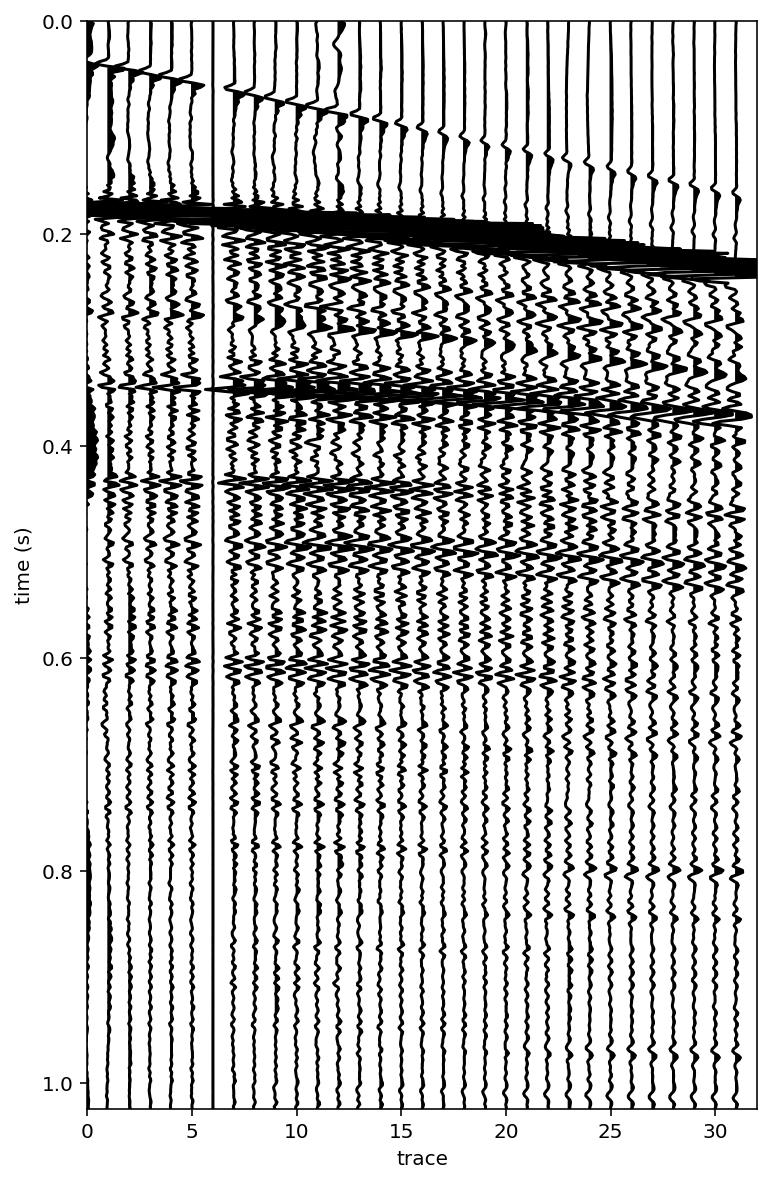

In [21]:
from fatiando.vis.mpl import seismic_wiggle

plt.figure(figsize=(6, 10))
seismic_wiggle(mat, dt=2e-3, scale=1, color='k')
plt.ylabel('time (s)')
plt.xlabel('trace')

In [22]:
from fatiando.vis import mpl

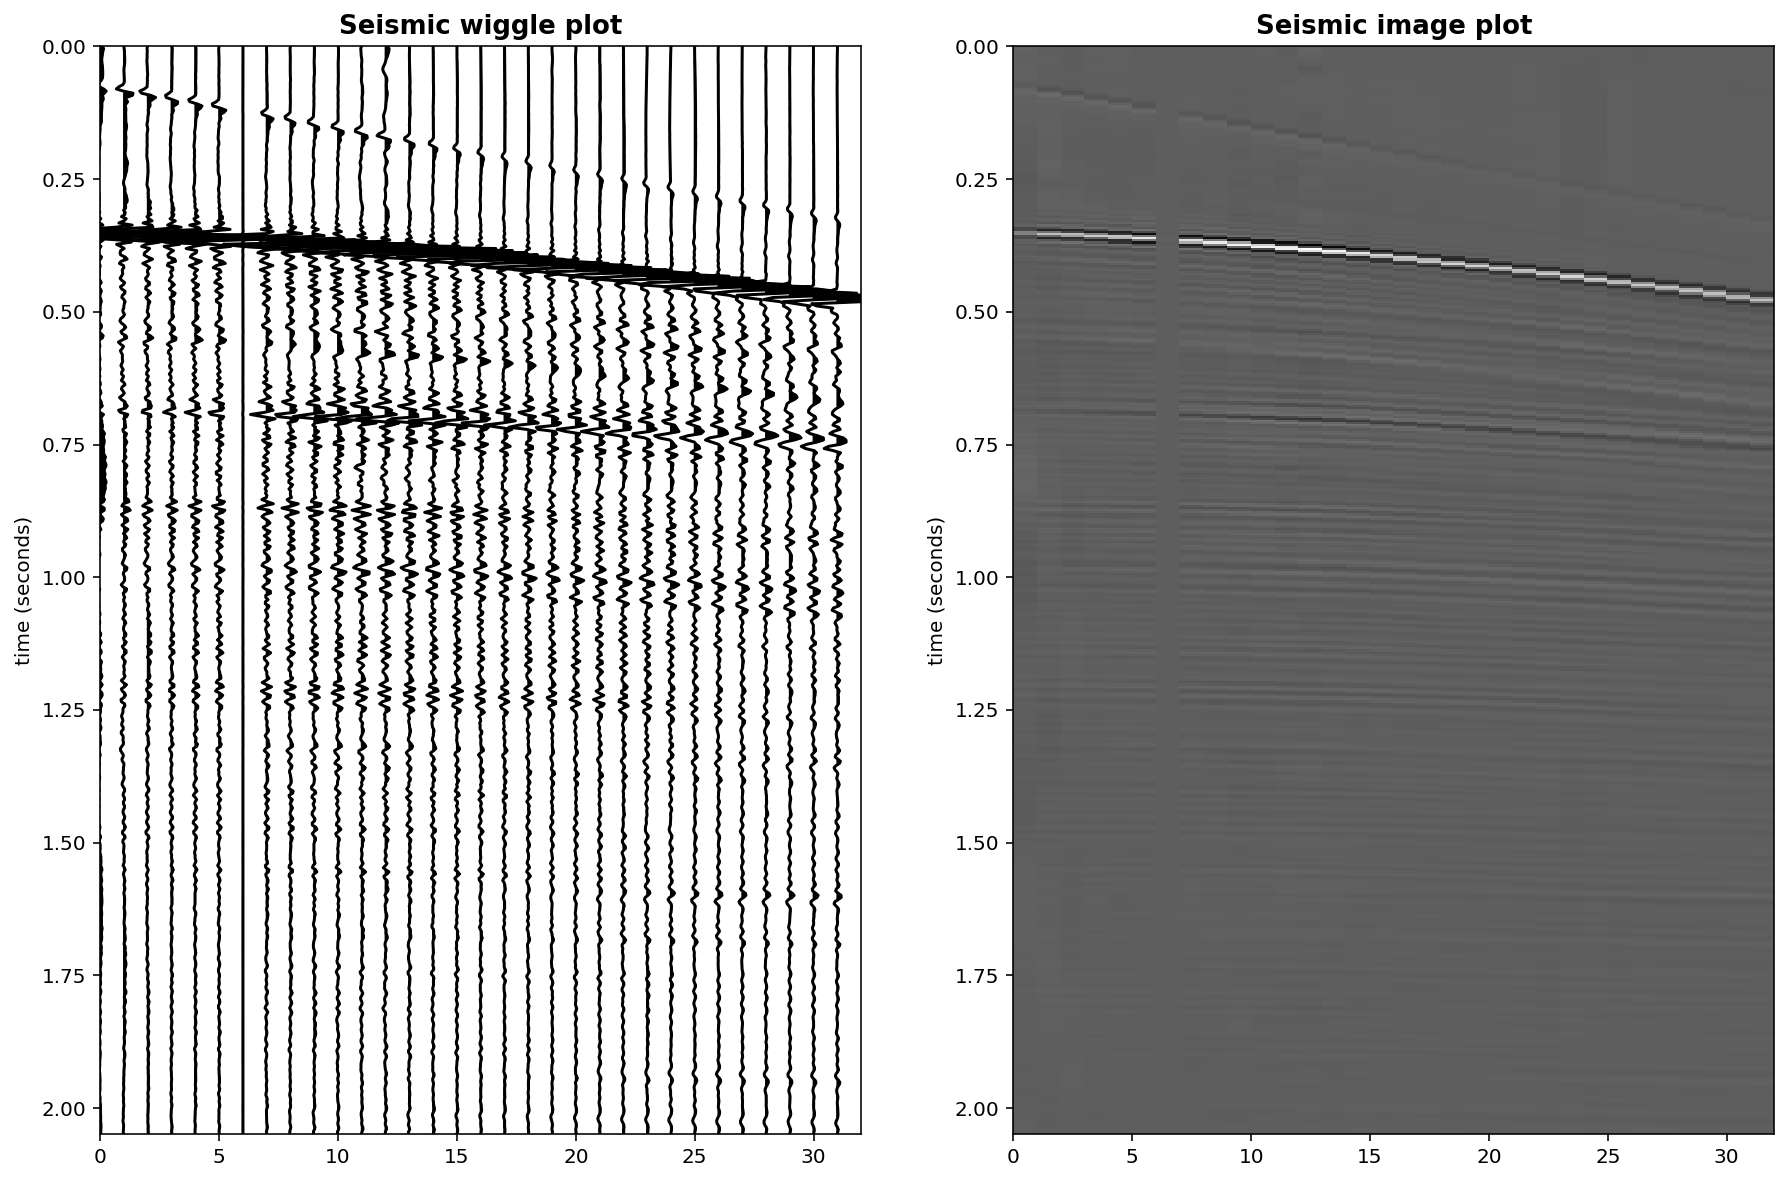

In [23]:
mpl.figure(figsize=(15, 10))
mpl.subplot(1, 2, 1)
mpl.ylabel('time (seconds)')
mpl.title("Seismic wiggle plot", fontsize=13, family='sans-serif',
          weight='bold')
# plot using wiggle
mpl.seismic_wiggle(mat, scale=0.5)
mpl.subplot(1, 2, 2)
mpl.ylabel('time (seconds)')
mpl.title("Seismic image plot", fontsize=13, family='sans-serif',
          weight='bold')
# plot using image
mpl.seismic_image(mat, aspect='auto')
mpl.show()

test: Create a 3D surface plot.

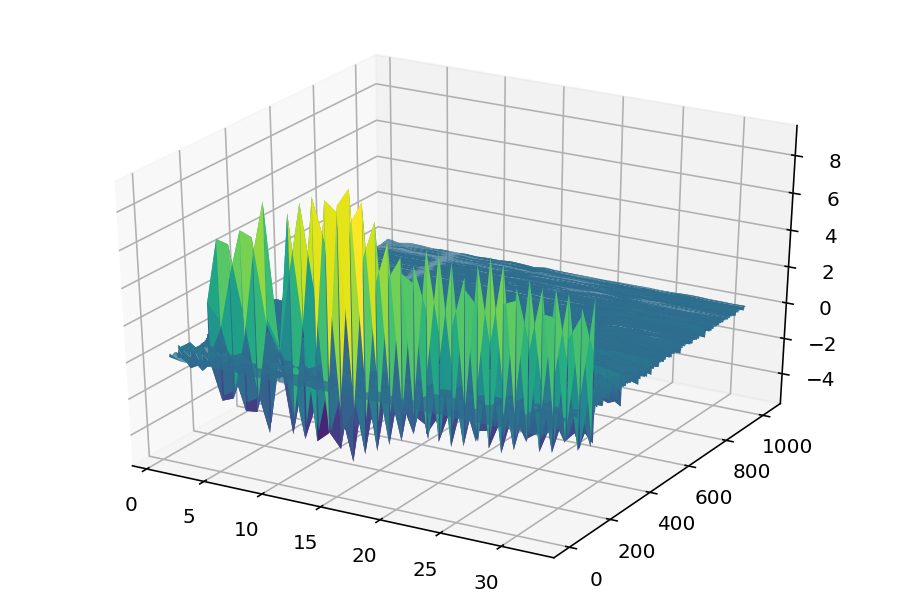

In [24]:
y = np.arange(t0, tmax+2, 2)
x = np.arange(1, 33, 1)
X, Y = np.meshgrid(x, y)
Z = mat

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()